In [214]:
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [215]:
df = pd.read_csv("Data/apartments_for_rent_classified_100K.csv", sep=";", encoding='cp1252')
df

/var/folders/rd/zf3y09wj69n3q6493fx5jmtr0000gn/T/ipykernel_78877/2100337387.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Data/apartments_for_rent_classified_100K.csv", sep=";", encoding='cp1252')


,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,...,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,...,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,...,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,...,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,...,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,5121219946,housing/rent/apartment,Houston - superb Apartment nearby fine dining,"Redefining urban living, in southeast Houston,...","Gym,Parking,Patio/Deck,Playground,Storage,Wood...",1.0,1.0,USD,No,Yes,...,$780,Monthly,605,NaN,Houston,TX,29.6151,-95.1998,RentDigs.com,1544185770
99488,5121219696,housing/rent/apartment,The Best of the Best in the City of Jacksonvil...,Courtney Manor Apartments offer the best of ev...,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gym...",2.0,2.0,USD,No,Yes,...,$813,Monthly,921,NaN,Jacksonville,FL,30.2254,-81.7579,RentDigs.com,1544185750
99489,5121219420,housing/rent/apartment,A great & large One BR apartment. Pet OK!,"Fully remodeled, new floor, kitchen cabinet, s...","Garbage Disposal,Refrigerator",1.0,1.0,USD,No,Yes,...,"$1,325",Monthly,650,NaN,San Diego,CA,32.7379,-117.0914,RentDigs.com,1544185729
99490,5121218935,housing/rent/apartment,"The Crest offers studio, 1, 2 & Three BR homes...","Amenities include a fitness facilities, swimmi...","Gym,Pool",1.0,1.0,USD,No,Yes,...,$931,Monthly,701,NaN,Huntersville,NC,35.4158,-80.8451,RentDigs.com,1544185670


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             99492 non-null  int64  
 1   category       99492 non-null  object 
 2   title          99492 non-null  object 
 3   body           99492 non-null  object 
 4   amenities      83448 non-null  object 
 5   bathrooms      99429 non-null  float64
 6   bedrooms       99368 non-null  float64
 7   currency       99492 non-null  object 
 8   fee            99492 non-null  object 
 9   has_photo      99492 non-null  object 
 10  pets_allowed   44138 non-null  object 
 11  price          99491 non-null  float64
 12  price_display  99491 non-null  object 
 13  price_type     99492 non-null  object 
 14  square_feet    99492 non-null  int64  
 15  address        7943 non-null   object 
 16  cityname       99190 non-null  object 
 17  state          99190 non-null  object 
 18  latitu

Bedrooms some null-values, remove these

In [217]:
df = df[df["bedrooms"] > -1]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99368 entries, 0 to 99491
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             99368 non-null  int64  
 1   category       99368 non-null  object 
 2   title          99368 non-null  object 
 3   body           99368 non-null  object 
 4   amenities      83353 non-null  object 
 5   bathrooms      99306 non-null  float64
 6   bedrooms       99368 non-null  float64
 7   currency       99368 non-null  object 
 8   fee            99368 non-null  object 
 9   has_photo      99368 non-null  object 
 10  pets_allowed   44091 non-null  object 
 11  price          99367 non-null  float64
 12  price_display  99367 non-null  object 
 13  price_type     99368 non-null  object 
 14  square_feet    99368 non-null  int64  
 15  address        7927 non-null   object 
 16  cityname       99066 non-null  object 
 17  state          99066 non-null  object 
 18  latitu

<AxesSubplot:>

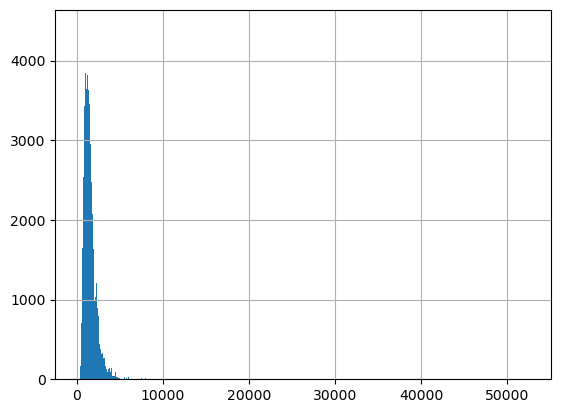

In [218]:
df["price"].hist(bins=1000)

In [219]:
df["has_photo"].value_counts()
df.groupby("has_photo")["price"].mean()

has_photo
No           1618.837571
Thumbnail    1462.725844
Yes          1551.831730
Name: price, dtype: float64

<AxesSubplot:>

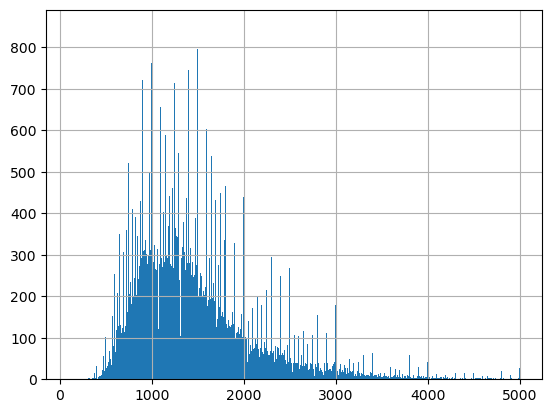

In [220]:
df[df["price"] > 5000].count()
df = df[df["price"] < 5000]
df["price"].hist(bins=1000)

In [221]:
df["category"].value_counts()

housing/rent/apartment            98808
housing/rent/commercial/retail       42
housing/rent                          7
housing/rent/home                     4
housing/rent/short_term               4
housing/rent/condo                    3
housing/rent/other                    1
Name: category, dtype: int64

In [222]:
df["price_type"].value_counts()

Monthly    98867
Weekly         2
Name: price_type, dtype: int64

In [223]:
df["fee"].value_counts()

No     98674
Yes      195
Name: fee, dtype: int64

Remove "outlier" values

In [224]:
df = df[df["category"] == "housing/rent/apartment"]
df = df[df["price_type"] == "Monthly"]
df = df[df["fee"] == "No"]

In [225]:
df["year"] = df["time"].apply(lambda t: datetime.fromtimestamp(t).strftime('%Y'))
df

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_type,square_feet,address,cityname,state,latitude,longitude,source,time,year
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,...,Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355,2019
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,...,Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340,2019
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,...,Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332,2019
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,...,Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330,2019
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,...,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,5121219946,housing/rent/apartment,Houston - superb Apartment nearby fine dining,"Redefining urban living, in southeast Houston,...","Gym,Parking,Patio/Deck,Playground,Storage,Wood...",1.0,1.0,USD,No,Yes,...,Monthly,605,NaN,Houston,TX,29.6151,-95.1998,RentDigs.com,1544185770,2018
99488,5121219696,housing/rent/apartment,The Best of the Best in the City of Jacksonvil...,Courtney Manor Apartments offer the best of ev...,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gym...",2.0,2.0,USD,No,Yes,...,Monthly,921,NaN,Jacksonville,FL,30.2254,-81.7579,RentDigs.com,1544185750,2018
99489,5121219420,housing/rent/apartment,A great & large One BR apartment. Pet OK!,"Fully remodeled, new floor, kitchen cabinet, s...","Garbage Disposal,Refrigerator",1.0,1.0,USD,No,Yes,...,Monthly,650,NaN,San Diego,CA,32.7379,-117.0914,RentDigs.com,1544185729,2018
99490,5121218935,housing/rent/apartment,"The Crest offers studio, 1, 2 & Three BR homes...","Amenities include a fitness facilities, swimmi...","Gym,Pool",1.0,1.0,USD,No,Yes,...,Monthly,701,NaN,Huntersville,NC,35.4158,-80.8451,RentDigs.com,1544185670,2018


Keep only from RentDigs.com to keep data consistent

In [226]:
df["source"].value_counts()

RentDigs.com         90353
RentLingo             6845
ListedBuy              554
GoSection8             434
RealRentals            255
RENTCafé                41
Listanza                28
SpreadMyAd              21
RENTOCULAR              17
tenantcloud             17
RentFeeder              12
Home Rentals             8
Claz                     6
rentbits                 5
vFlyer                   5
Seattle Rentals          2
Real Estate Shows        1
Nest Seekers             1
Real Estate Agent        1
Apartable                1
Z57                      1
FreeAdsTime              1
AgentWebsite             1
HousesForRent            1
Name: source, dtype: int64

In [227]:
df = df[df["source"] == "RentDigs.com"]
df["source"].value_counts()
df

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_type,square_feet,address,cityname,state,latitude,longitude,source,time,year
6756,5668556637,housing/rent/apartment,Owner Pays All Utilities!,Newport News OWNER PAYS ALL UTILITIES!!! Quain...,"AC,Cable or Satellite,Patio/Deck,Wood Floors",1.0,1.0,USD,No,Thumbnail,...,Monthly,400,15910 Warwick Boulevard,Newport News,VA,37.1451,-76.5397,RentDigs.com,1577354122,2019
6758,5668556669,housing/rent/apartment,One-of-a-kind Enumclaw Apartment for rent!,Enumclaw Recently up-to-date and ready to rent...,"Cable or Satellite,Dishwasher,Parking,Storage,...",1.0,2.0,USD,No,Thumbnail,...,Monthly,850,2110 Wells St Apartment #1,Enumclaw,WA,47.2087,-121.8634,RentDigs.com,1577354125,2019
6860,5666447524,housing/rent/apartment,Wildhorse Ridge,"Denver showing available jan 7, 2020available ...","AC,Cable or Satellite,Clubhouse,Dishwasher,Fir...",1.0,1.0,USD,No,Thumbnail,...,Monthly,1098,21309 E 50th Avenue,Denver,CO,39.7789,-104.7545,RentDigs.com,1577185741,2019
6865,5666448089,housing/rent/apartment,Lawrence Landing,Indianapolis Enjoy waterfront living in a spac...,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gym...",1.5,2.0,USD,No,Thumbnail,...,Monthly,1047,6875 Faris Avenue,Indianapolis,IN,39.8373,-86.0562,RentDigs.com,1577185784,2019
6866,5666449065,housing/rent/apartment,Brand New Duplex,Harker Heights 2 Beds two Bathrooms w/ study S...,"AC,Cable or Satellite,Dishwasher,Internet Acce...",2.0,2.0,USD,No,Thumbnail,...,Monthly,1150,1521 Aztec Trace,Harker Heights,TX,31.0283,-97.6473,RentDigs.com,1577185849,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,5121219946,housing/rent/apartment,Houston - superb Apartment nearby fine dining,"Redefining urban living, in southeast Houston,...","Gym,Parking,Patio/Deck,Playground,Storage,Wood...",1.0,1.0,USD,No,Yes,...,Monthly,605,NaN,Houston,TX,29.6151,-95.1998,RentDigs.com,1544185770,2018
99488,5121219696,housing/rent/apartment,The Best of the Best in the City of Jacksonvil...,Courtney Manor Apartments offer the best of ev...,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gym...",2.0,2.0,USD,No,Yes,...,Monthly,921,NaN,Jacksonville,FL,30.2254,-81.7579,RentDigs.com,1544185750,2018
99489,5121219420,housing/rent/apartment,A great & large One BR apartment. Pet OK!,"Fully remodeled, new floor, kitchen cabinet, s...","Garbage Disposal,Refrigerator",1.0,1.0,USD,No,Yes,...,Monthly,650,NaN,San Diego,CA,32.7379,-117.0914,RentDigs.com,1544185729,2018
99490,5121218935,housing/rent/apartment,"The Crest offers studio, 1, 2 & Three BR homes...","Amenities include a fitness facilities, swimmi...","Gym,Pool",1.0,1.0,USD,No,Yes,...,Monthly,701,NaN,Huntersville,NC,35.4158,-80.8451,RentDigs.com,1544185670,2018


### Decision Tree

In [597]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

In [598]:
KEEP_COLS = ["price", "bathrooms", "bedrooms"]
df_dt = df[KEEP_COLS]
df_dt

,price,bathrooms,bedrooms
6756,899.0,1.0,1.0
6758,1695.0,1.0,2.0
6860,1600.0,1.0,1.0
6865,799.0,1.5,2.0
6866,925.0,2.0,2.0
...,...,...,...
99487,780.0,1.0,1.0
99488,813.0,2.0,2.0
99489,1325.0,1.0,1.0
99490,931.0,1.0,1.0


<AxesSubplot:>

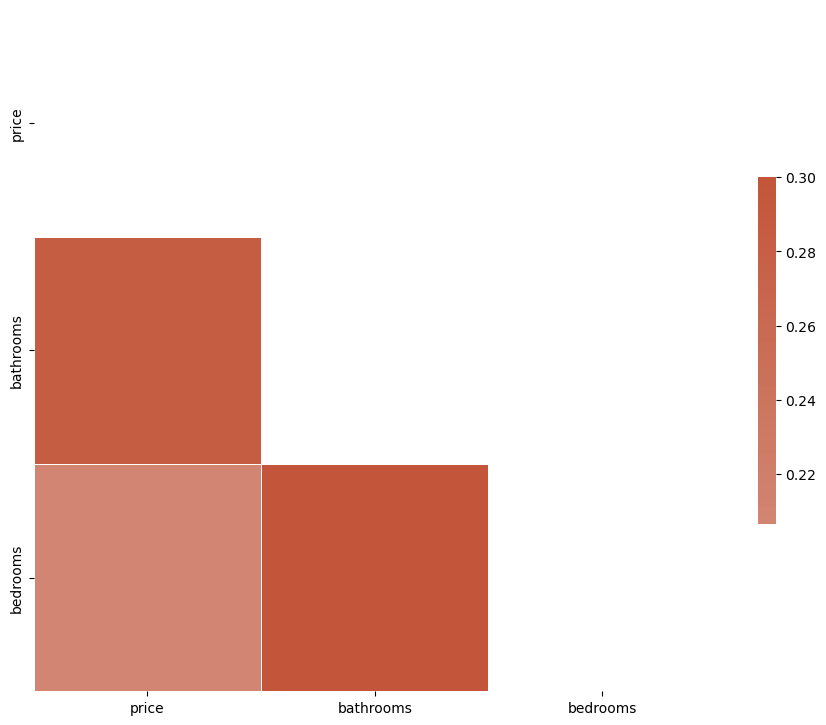

In [599]:
import seaborn as sns

# Compute the correlation matrix
corr = df_dt.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [600]:
def get_label(price): 
    if price < 2000: 
        return 0
    else:
        return 1

In [601]:
df_dt["label"] = df_dt["price"].apply(lambda p: get_label(p))
df_dt.groupby("label").count()

/var/folders/rd/zf3y09wj69n3q6493fx5jmtr0000gn/T/ipykernel_78877/1890825687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dt["label"] = df_dt["price"].apply(lambda p: get_label(p))


,price,bathrooms,bedrooms
label,,,
0,74094,74085,74094
1,16259,16259,16259


In [602]:
df_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90353 entries, 6756 to 99491
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      90353 non-null  float64
 1   bathrooms  90344 non-null  float64
 2   bedrooms   90353 non-null  float64
 3   label      90353 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 3.4 MB


Bathrooms some NaN-values, remove

In [603]:
df_dt = df_dt[df_dt["bathrooms"] > -1]

Label encode categories

In [604]:
# label_encoder = preprocessing.LabelEncoder() 
# df_dt['state'] = label_encoder.fit_transform(df_dt['state']) 

Split into train/test-set

In [605]:
df_dt = df_dt.drop(columns=["price"])
X = df_dt.iloc[:, :-1].values
y = df_dt.iloc[:, -1].values

In [606]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Train model

In [624]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth=5)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

Predict new result

In [625]:
y_pred = classifier.predict(X_test)

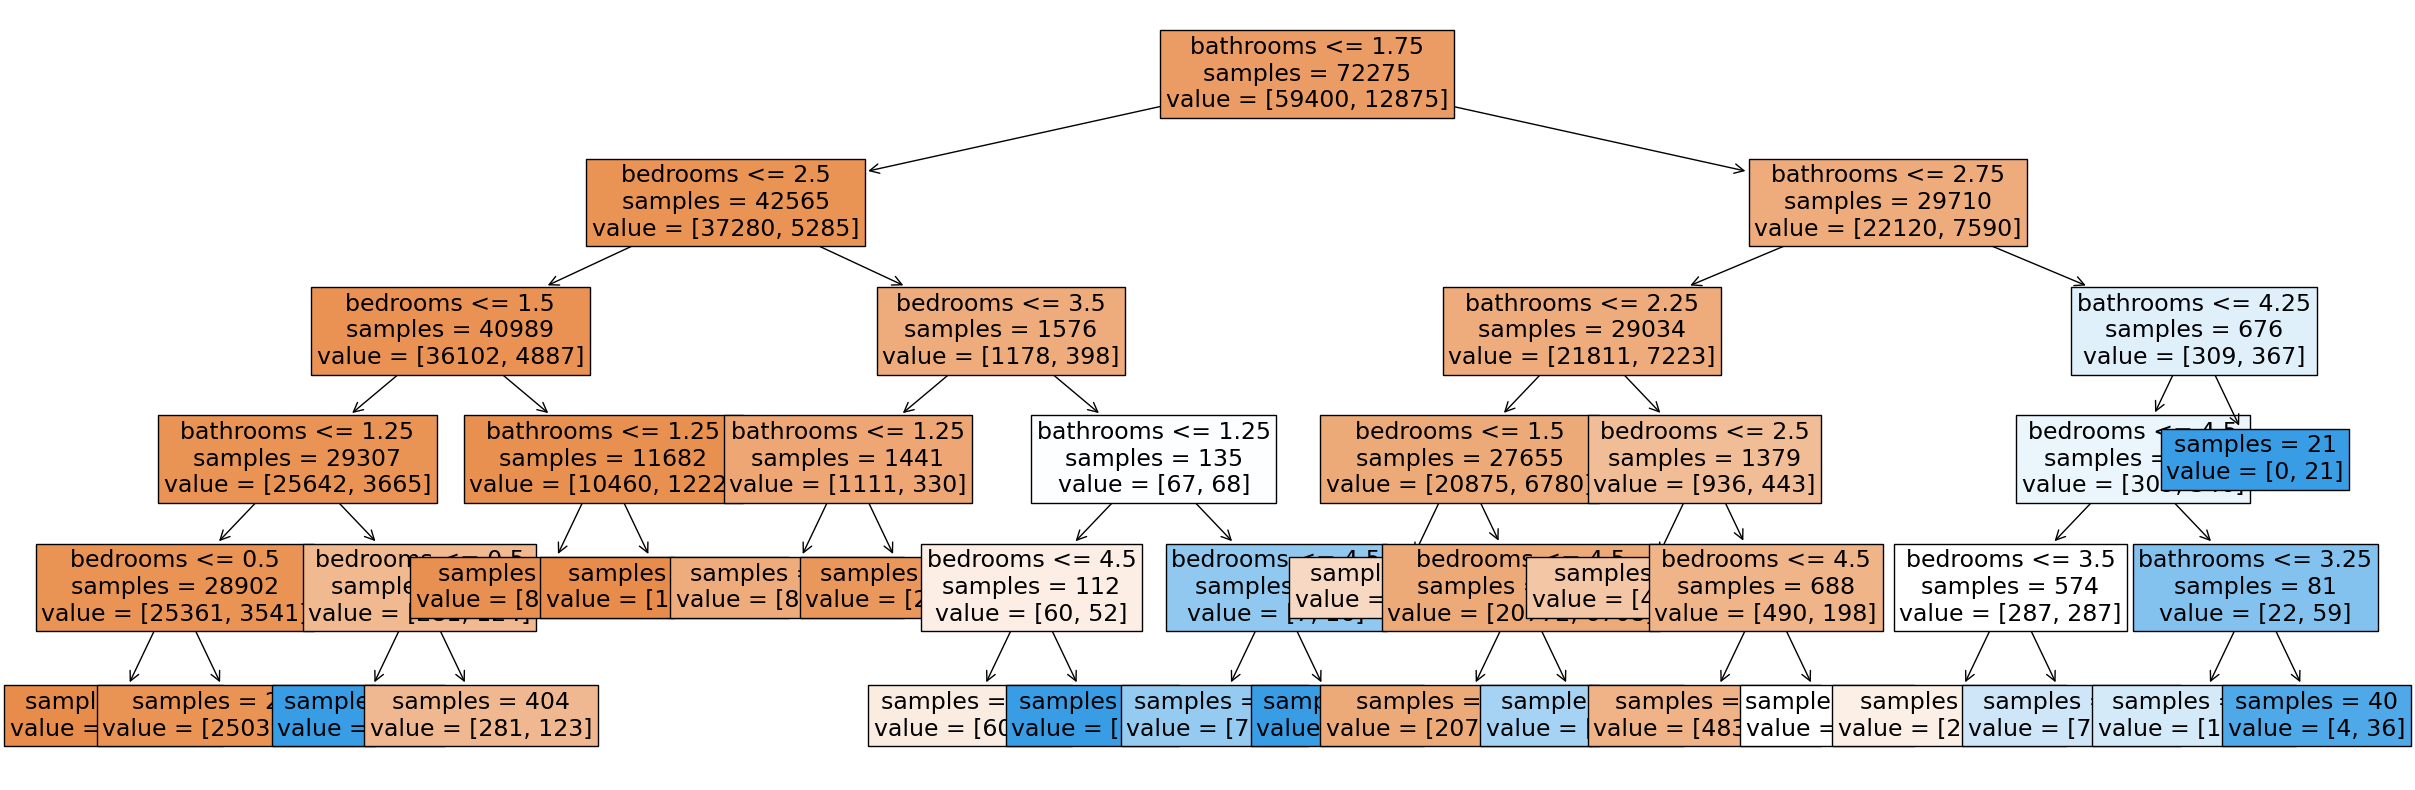

In [626]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30, 10))
plot_tree(
    classifier,
    feature_names = KEEP_COLS[1:],
    impurity=False,
    filled=True,
    fontsize=17
)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


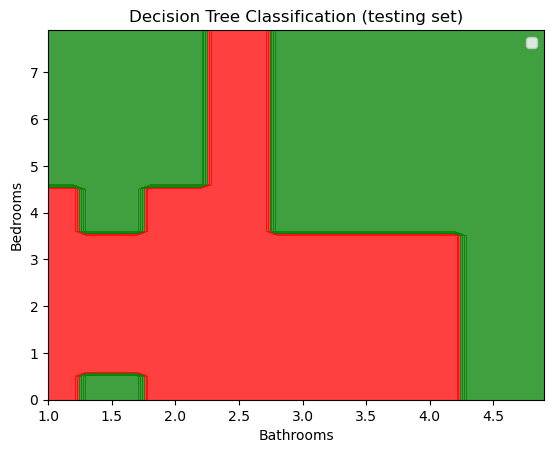

In [627]:
from matplotlib.colors import ListedColormap
X1, X2 = np.meshgrid(np.arange(start = X_test[:, 0].min(), stop = X_test[:, 0].max(), step = 0.1),
                     np.arange(start = X_test[:, 1].min(), stop = X_test[:, 1].max(), step = 0.1))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('Decision Tree Classification (testing set)')
plt.xlabel('Bathrooms')
plt.ylabel('Bedrooms')
plt.legend()
plt.show()